In [2]:
# Import dependencies for webscraping, pandas, and matplotlib
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)


# Visit the Mars temp data site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)


In [4]:
# setup the html parser
html = browser.html
mars_soup = soup(html, 'html.parser')

In [5]:
# scrape the site for data to produce a pandas dataframe
df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')
df

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [6]:
# pull the first index as the first row of the dataframe
mars_df = df[0]
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [7]:
# rename the columns of the dataframe 
mars_df.columns=['ID', 'Terrestrial_Date', 'Martian_Days', 'Solar_Longitude', 'Month', 'Min_Temp', 'Pressure']

mars_df

,ID,Terrestrial_Date,Martian_Days,Solar_Longitude,Month,Min_Temp,Pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [8]:
# check the data types
mars_df.dtypes

ID                    int64
Terrestrial_Date     object
Martian_Days          int64
Solar_Longitude       int64
Month                 int64
Min_Temp            float64
Pressure            float64
dtype: object

In [9]:
# check null values
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1867 non-null   int64  
 1   Terrestrial_Date  1867 non-null   object 
 2   Martian_Days      1867 non-null   int64  
 3   Solar_Longitude   1867 non-null   int64  
 4   Month             1867 non-null   int64  
 5   Min_Temp          1867 non-null   float64
 6   Pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [10]:
# With the DataFrame established, set the data types to the correct data types.
mars_df[["ID", "Martian_Days", "Solar_Longitude", "Month"]] = mars_df[["ID", "Martian_Days", "Solar_Longitude", "Month"]].astype("int64")
mars_df[["Min_Temp", "Pressure"]] = mars_df[["Min_Temp", "Pressure"]].astype(float)
mars_df["Terrestrial_Date"] = pd.to_datetime(mars_df["Terrestrial_Date"])

# Verify the data types are correct.
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                1867 non-null   int64         
 1   Terrestrial_Date  1867 non-null   datetime64[ns]
 2   Martian_Days      1867 non-null   int64         
 3   Solar_Longitude   1867 non-null   int64         
 4   Month             1867 non-null   int64         
 5   Min_Temp          1867 non-null   float64       
 6   Pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


In [11]:
browser.quit()

In [12]:
# how many months exist on Mars?
mars_months = mars_df['Month'].max()
print(mars_months)

12


In [13]:
# How many Martian (and not Earth) days worth of data exist in the scraped dataset?
martian_data = mars_df["Martian_Days"].max()
print(martian_data)

1977


In [14]:
# What are the coldest and the warmest months on Mars (at the location of Curiosity)? 
months = mars_df.groupby(by="Month").mean()
months


,ID,Martian_Days,Solar_Longitude,Min_Temp,Pressure
Month,,,,,
1,1013.873563,1077.574713,15.281609,-77.160920,862.488506
2,1109.882022,1175.853933,44.258427,-79.932584,889.455056
3,1132.697917,1204.406250,75.010417,-83.307292,877.322917
4,1175.164948,1244.500000,104.365979,-82.747423,806.329897
5,1115.033557,1182.691275,132.885906,-79.308725,748.557047
6,735.306122,750.829932,164.897959,-75.299320,745.054422
7,714.549296,715.105634,194.894366,-72.281690,795.105634
8,718.078014,795.333333,224.347518,-68.382979,873.829787
9,785.843284,861.186567,254.052239,-69.171642,913.305970


In [15]:
# Get the answer by averaging the minimum daily temperature of all the months. 
avg_temp = months["Min_Temp"]
avg_temp

Month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: Min_Temp, dtype: float64

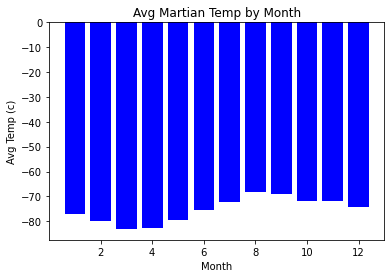

In [16]:
# Plot the results as a bar chart.
fig, ax=plt.subplots()
fig = ax.bar(range(1, 13), avg_temp, width=0.8, color = 'blue')

# add title and format axes
ax.set_title("Avg Martian Temp by Month")
ax.set_xlabel("Month")
ax.set_ylabel("Avg Temp (c)")

plt.show()


In [17]:
print(f"The coldest month is {avg_temp.min(): .4} degrees celsius during month 3")
print(f"The warmest month is {avg_temp.max(): .4} degrees celsius during month 8")

The coldest month is -83.31 degrees celsius during month 3
The warmest month is -68.38 degrees celsius during month 8


In [18]:
avg_pressure = months["Pressure"]
avg_pressure

Month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: Pressure, dtype: float64

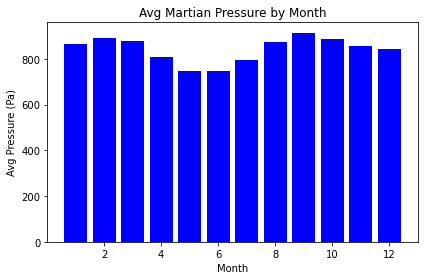

In [19]:
# Plot the results as a bar chart.
fig, ax=plt.subplots()
fig = ax.bar(range(1, 13), avg_pressure, width=0.8, color = 'blue')

# add title and format axes
ax.set_title("Avg Martian Pressure by Month")
ax.set_xlabel("Month")
ax.set_ylabel("Avg Pressure (Pa)")

plt.tight_layout()
plt.show()

In [20]:
# What are the lowest and the highest atmospheric pressure months on Mars (at the location of Curiosity)? 
print(f"The lowest atmospheric pressure is {avg_pressure.min(): .5} Pa during month 6.")
print(f"The highest atmospheric pressure is {avg_pressure.max(): .5} Pa during month 9.")

The lowest atmospheric pressure is  745.05 Pa during month 6.
The highest atmospheric pressure is  913.31 Pa during month 9.


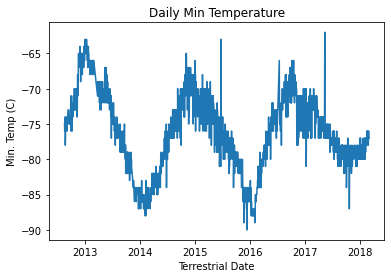

In [21]:
# how many terrestrial (Earth) days exist in a martian year?

plt.plot(mars_df["Terrestrial_Date"], mars_df["Min_Temp"])
plt.title("Daily Min Temperature")
plt.xlabel("Terrestrial Date")
plt.ylabel("Min. Temp (C)")

plt.yticks(np.arange(-65, -95, step=-5))

plt.show()

In [22]:
print("There looks to be around 3 Martian cycles over 5.4 Terrestrial (Earth) years.")
x = (365*5.4)/3
print(f"Therefore, there are roughly {x: 0.4} Terrestrial days in a Martian year")

There looks to be around 3 Martian cycles over 5.4 Terrestrial (Earth) years.
Therefore, there are roughly  657.0 Terrestrial days in a Martian year


In [23]:
# set output file name
output_data_file = 'mars_data.csv'

#export data to a csv file
mars_df.to_csv(output_data_file)